# Importing Modules

In [1]:
from scipy import stats
from scipy import optimize

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

# Review of Statistics and Probability

In [2]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [3]:
np.median(x)

3.0

In [4]:
x.min(), x.max()

(0.9, 6.7)

In [5]:
x.var()

3.0700000000000007

In [6]:
x.std()

1.7521415467935233

In [7]:
x.var(ddof=1)

3.5085714285714293

In [8]:
x.std(ddof=1)

1.8731181032095732

# Random Numbers

In [9]:
np.random.rand()

0.7945695655558064

In [10]:
np.random.randn()

0.7932190336483554

In [11]:
np.random.rand(5)

array([0.19930451, 0.54820093, 0.68399916, 0.48516512, 0.62578441])

In [12]:
np.random.randn(2, 4)

array([[ 1.45976997,  1.48969987,  0.37381689, -2.50015503],
       [ 0.1707569 ,  0.46727769,  0.89697654,  0.34818681]])

In [13]:
np.random.randint(10, size=10)

array([1, 5, 7, 0, 3, 6, 7, 4, 9, 5])

In [14]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 13, 15, 18, 16, 15, 16, 14, 14, 11],
       [15, 15, 18, 15, 14, 16, 18, 15, 18, 15]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

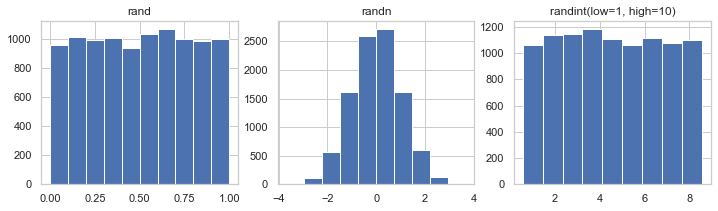

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000),bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [16]:
np.random.choice(10, 5, replace=False)

array([1, 9, 5, 8, 2])

In [17]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [18]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [19]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [20]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [21]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [22]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [23]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [24]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# Random Variables and Distributions

In [25]:
X = stats.norm(1, 0.5)

In [26]:
X.mean()

1.0

In [27]:
X.median()

1.0

In [28]:
X.std()

0.5

In [29]:
X.var()

0.25

In [30]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [31]:
X.stats()

(array(1.), array(0.25))

In [32]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [33]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [34]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [35]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [36]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

Text(0, 0.5, 'Poisson dist.')

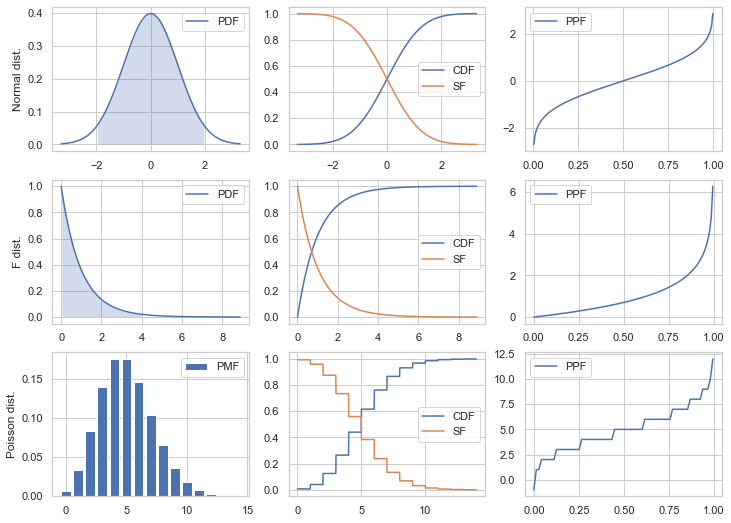

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [38]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [39]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [40]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [41]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=True, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

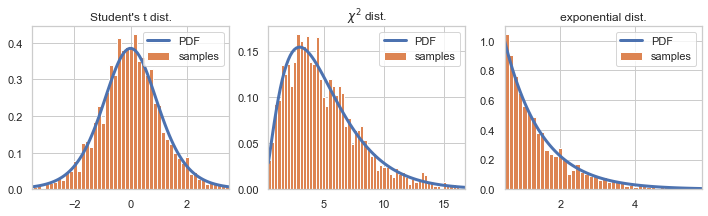

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [43]:
X = stats.chi2(df=5)

In [44]:
X_samples = X.rvs(500)

In [45]:
df, loc, scale = stats.chi2.fit(X_samples)

In [46]:
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

In [47]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

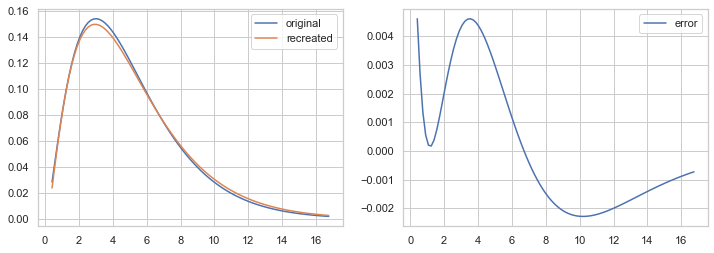

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

# Hypothesis Testing

In [49]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

In [50]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.915637976521836

In [51]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-4.883742747891776

In [52]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [53]:
2 * stats.norm().cdf(-abs(z))

8.849379778846592e-07

In [54]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

4.002543252096778e-06

In [55]:
t, p = stats.ttest_1samp(X_samples, mu)
t

-0.9096968387197821

In [56]:
p

0.3651918584495788

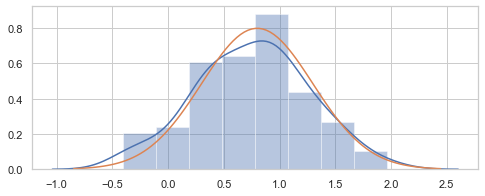

In [57]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [58]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [59]:
t, p = stats.ttest_ind(X1_sample, X2_sample)
t

3.159596504360957

In [60]:
p

0.002101524044318263

In [61]:
mu1, mu2

(0.9002968998016874, 0.4690011995884138)

# Nonparametric Methods

In [62]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

In [63]:
kde = stats.kde.gaussian_kde(X_samples)

In [64]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

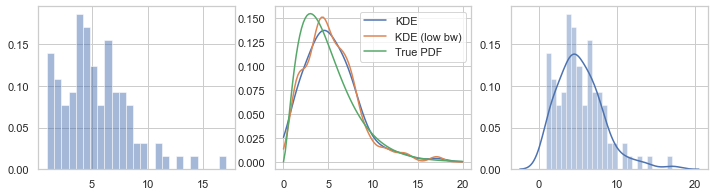

In [65]:
x = np.linspace(0, 20, 100)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [66]:
kde.resample(10)

array([[8.15047721, 5.7798197 , 7.62567558, 7.1776504 , 5.30703486,
        5.34635937, 0.79007269, 7.95342713, 7.89838973, 5.99040865]])

In [67]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [68]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.
                           dataset.mean(), args=(q,))[0]

In [69]:
kde_ppf = np.vectorize(_kde_ppf)

In [70]:
kde_ppf([0.05, 0.95])

array([ 0.83543261, 11.03990386])